## Pandas Review 
### matplotlib

In [ ]:
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
#plt.rc('font', family='AppleGothic')   # MacOS font

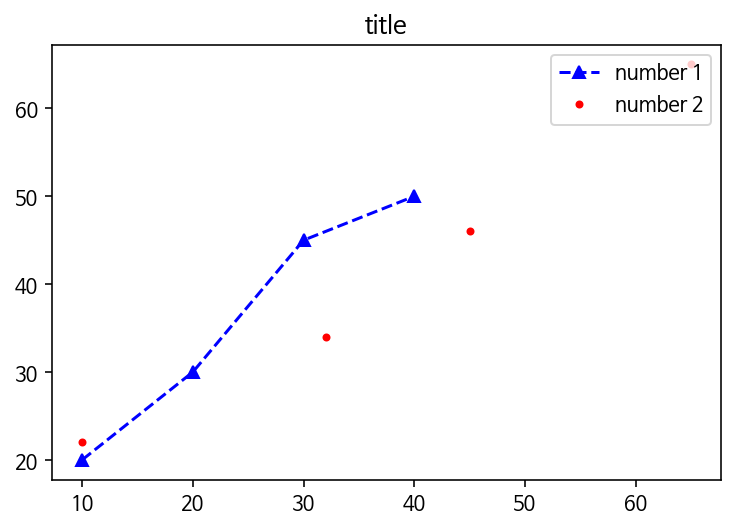

In [ ]:
import matplotlib.pyplot as plt

plt.title('title')
plt.plot([10, 20, 30, 40], [20, 30, 45, 50], 'b^--', label = 'number 1')
plt.plot([10, 32, 45, 65], [22, 34, 46, 65], 'r.', label = 'number 2')
plt.legend(loc = 1)
plt.show()

## 관광객 Top 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 

Mounted at /content/drive


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
df = pd.read_excel('ktour_2010_2019.xlsx', header = 1, skipfooter= 3, 
                   usecols = 'A:E, G:I, K, M, O',
                   names = ['연도', '월', '대륙', '국적', '계', '관광', '전체비율(%)', '상용', '공용', '유학연수', '기타'])
df.head(20)

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0
1,NaN,NaN,NaN,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0
2,NaN,NaN,NaN,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0
3,NaN,NaN,NaN,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0
4,NaN,NaN,NaN,마카오,554,554.0,0.14,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,필리핀,21214,3984.0,0.99,219.0,104.0,87.0,16820.0
6,NaN,NaN,NaN,인도네시아,5061,1840.0,0.46,327.0,3.0,65.0,2826.0
7,NaN,NaN,NaN,태국,17814,13374.0,3.34,39.0,13.0,53.0,4335.0
8,NaN,NaN,NaN,베트남,4515,1384.0,0.35,284.0,21.0,150.0,2676.0
9,NaN,NaN,NaN,인도,6026,1646.0,0.41,1387.0,7.0,68.0,2918.0


In [ ]:
df['연도'].fillna(method = 'ffill', inplace = True) #위에껄로 채우기
df['월'].fillna(method = 'ffill', inplace = True)
df['대륙'].fillna(method = 'ffill', inplace = True)
df.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0
4,2010,01,아시아,마카오,554,554.0,0.14,NaN,NaN,NaN,NaN


In [ ]:
df['기준연월'] = df['연도'].astype(str) + '-' + df['월'].astype(str)
df.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0,2010-01
4,2010,01,아시아,마카오,554,554.0,0.14,NaN,NaN,NaN,NaN,2010-01


In [ ]:
# 소계 제거 2

c_list = ['아시아', '아메리카', '유럽', '오세아니아', '아프리카', '기타', '교포']

condition = (df['대륙'].isin(c_list) == True)
df_country = df[condition]
df_country

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0,2010-01
4,2010,01,아시아,마카오,554,554.0,0.14,NaN,NaN,NaN,NaN,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7683,2019,05,오세아니아,오세아니아 기타,638,499.0,0.04,2.0,10.0,6.0,121.0,2019-05
7685,2019,05,아프리카,남아프리카공화국,1064,513.0,0.04,9.0,7.0,2.0,533.0,2019-05
7686,2019,05,아프리카,아프리카 기타,3214,1208.0,0.10,578.0,72.0,93.0,1263.0,2019-05
7688,2019,05,기타,국적미상,72,44.0,0.00,3.0,NaN,NaN,25.0,2019-05


In [ ]:
df_country = df_country.fillna(0)
df_country

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,0.0,21.0,595.0,2010-01
4,2010,01,아시아,마카오,554,554.0,0.14,0.0,0.0,0.0,0.0,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7683,2019,05,오세아니아,오세아니아 기타,638,499.0,0.04,2.0,10.0,6.0,121.0,2019-05
7685,2019,05,아프리카,남아프리카공화국,1064,513.0,0.04,9.0,7.0,2.0,533.0,2019-05
7686,2019,05,아프리카,아프리카 기타,3214,1208.0,0.10,578.0,72.0,93.0,1263.0,2019-05
7688,2019,05,기타,국적미상,72,44.0,0.00,3.0,0.0,0.0,25.0,2019-05


In [ ]:
df_country.to_excel('./country_ktour.xlsx', index = False)

## country_ktour Top 5

In [ ]:
df_country

In [ ]:
df_country['관광객비율(%)'] = round(df_country['관광']/df_country['계']*100, 2)

In [ ]:
df_country

In [ ]:
df_country.sort_values(by = '관광객비율(%)', ascending = False)


In [ ]:
x = df_country.pivot_table(values = '관광', index = '기준연월', 
                          aggfunc = 'sum')
x

In [ ]:
y = df_country.pivot_table(values = '전체비율(%)', index = '국적', 
                          aggfunc = 'mean')
y.sort_values(by = '전체비율(%)', ascending = False).head(5)


,전체비율(%)
국적,
중국,32.046106
일본,28.488761
대만,6.584602
미국,6.033982
홍콩,4.639381


In [ ]:

df_country['기준연월'] = pd.to_datetime(df_country['기준연월'])

## top 5의 연도별 추이

In [ ]:
c_lst = ['중국', '일본', '대만', '미국', '홍콩']

In [ ]:
condition = (df['국적'].isin(c_lst) == True)
df_top5 = df[condition]
df_top5

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0,2010-01
26,2010,01,아메리카,미국,43065,26943.0,6.72,1195.0,2145.0,135.0,12647.0,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7625,2019,05,아시아,중국,500413,413949.0,33.56,4034.0,534.0,14003.0,67893.0,2019-05
7626,2019,05,아시아,일본,286273,279174.0,22.63,2019.0,91.0,715.0,4274.0,2019-05
7627,2019,05,아시아,대만,101779,100004.0,8.11,84.0,11.0,234.0,1446.0,2019-05
7628,2019,05,아시아,홍콩,57026,55756.0,4.52,56.0,2.0,147.0,1065.0,2019-05


In [ ]:
df_top5_y = df_top5.set_index(['기준연월'])
df_top5_y

In [ ]:
df_top5_c = df_top5.set_index(['국적'])
df_top5_c.head(10)

,연도,월,대륙,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
국적,,,,,,,,,,,
중국,2010,01,아시아,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
일본,2010,01,아시아,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
대만,2010,01,아시아,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
홍콩,2010,01,아시아,14545,13874.0,3.46,55.0,NaN,21.0,595.0,2010-01
미국,2010,01,아메리카,43065,26943.0,6.72,1195.0,2145.0,135.0,12647.0,2010-01
중국,2010,02,아시아,140571,60590.0,13.57,7907.0,68.0,29546.0,42460.0,2010-02
일본,2010,02,아시아,230362,224475.0,50.27,1455.0,63.0,1172.0,3197.0,2010-02
대만,2010,02,아시아,36651,35758.0,8.01,45.0,18.0,234.0,596.0,2010-02
홍콩,2010,02,아시아,23051,22462.0,5.03,47.0,NaN,65.0,477.0,2010-02


In [ ]:
df_top5_c.index

Index(['중국', '일본', '대만', '홍콩', '미국', '중국', '일본', '대만', '홍콩', '미국',
       ...
       '중국', '일본', '대만', '홍콩', '미국', '중국', '일본', '대만', '홍콩', '미국'],
      dtype='object', name='국적', length=565)

In [ ]:
#이거임

countrynames = ['중국','일본','대만','미국','홍콩']
plt.figure(figsize = (12,4))

for i in countrynames:
    filter = df_country[df_country['국적'] == i]
    plt.plot(filter['기준연월'], filter['전체비율(%)'], label = i)

plt.title('한국으로 관광오는 Top 5 국가의 관광객 비율 추이 (2010-2019)')
plt.xlabel('기준연월')
plt.ylabel('전체비율(%)')    
#plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2018-01'])
plt.yticks([10, 20, 30, 40, 50, 60, 70])
plt.legend(loc = 1)
plt.show()




NameError: ignored

<Figure size 864x288 with 0 Axes>

In [ ]:
# 다섯 개 하나하나 보이기

countrynames = ['중국','일본','대만','미국','홍콩']

for i in countrynames:
    filter = df_country[df_country['국적'] == i]
    plt.figure(figsize = (12,4))
    plt.plot(filter['기준연월'], filter['전체비율(%)'], label = i)
    plt.title(f'한국으로 관광오는 {i}의 관광객 비율 추이 (2010-2019)')
    plt.xlabel('기준연월')
    plt.ylabel('전체비율(%)')    
    #plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2018-01'])
    plt.yticks([10, 20, 30, 40, 50, 60, 70])
    plt.show()


## heatmap

In [ ]:
df_pivot = df_country.pivot_table(values = '관광', index = '연도', columns = '월')
df_pivot

월,10,11,12,01,02,03,04,05,06,07,08,09
연도,,,,,,,,,,,,
2010,10970.733333,9305.400000,8339.816667,6680.300000,7442.083333,9090.700000,9054.950000,8755.666667,8674.566667,9018.083333,9670.116667,9112.316667
2011,12803.266667,11287.566667,11005.166667,6666.633333,7182.033333,8987.966667,9066.233333,8929.533333,9773.066667,11131.766667,11969.050000,11249.500000
2012,13218.150000,11061.366667,11041.500000,9283.466667,9572.450000,11855.433333,12892.816667,12214.800000,12590.016667,13531.883333,14245.833333,12772.583333
2013,13963.766667,11841.300000,12219.633333,9512.633333,10139.733333,12613.300000,12120.283333,10973.533333,12672.616667,14540.600000,16442.833333,14221.233333
2014,17613.400000,15002.833333,14795.016667,10672.250000,10725.533333,14432.116667,16361.916667,15854.700000,15769.616667,17165.083333,18070.066667,15662.133333
2015,17935.883333,15194.116667,15018.850000,12054.250000,13585.633333,15974.883333,18548.400000,17678.833333,8632.100000,6990.500000,12180.133333,15131.233333
2016,21728.200000,17941.183333,18379.483333,14417.733333,14166.583333,18724.416667,20236.683333,20044.866667,21285.266667,23424.933333,21875.233333,19990.833333
2017,14998.016667,14679.083333,15432.300000,16303.716667,15882.466667,16173.150000,14244.483333,12309.833333,12919.683333,13039.816667,13620.433333,13990.250000
2018,21153.350000,18845.150000,18539.683333,12378.866667,13174.616667,18092.366667,18189.216667,16524.150000,17597.583333,17176.866667,18345.183333,16888.766667


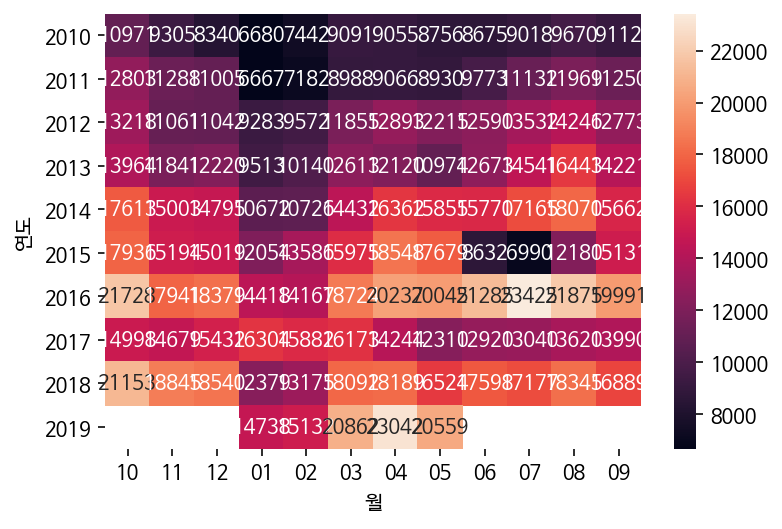

In [ ]:
import seaborn as sns
sns.heatmap(df_pivot, fmt = '.0f', annot = True)

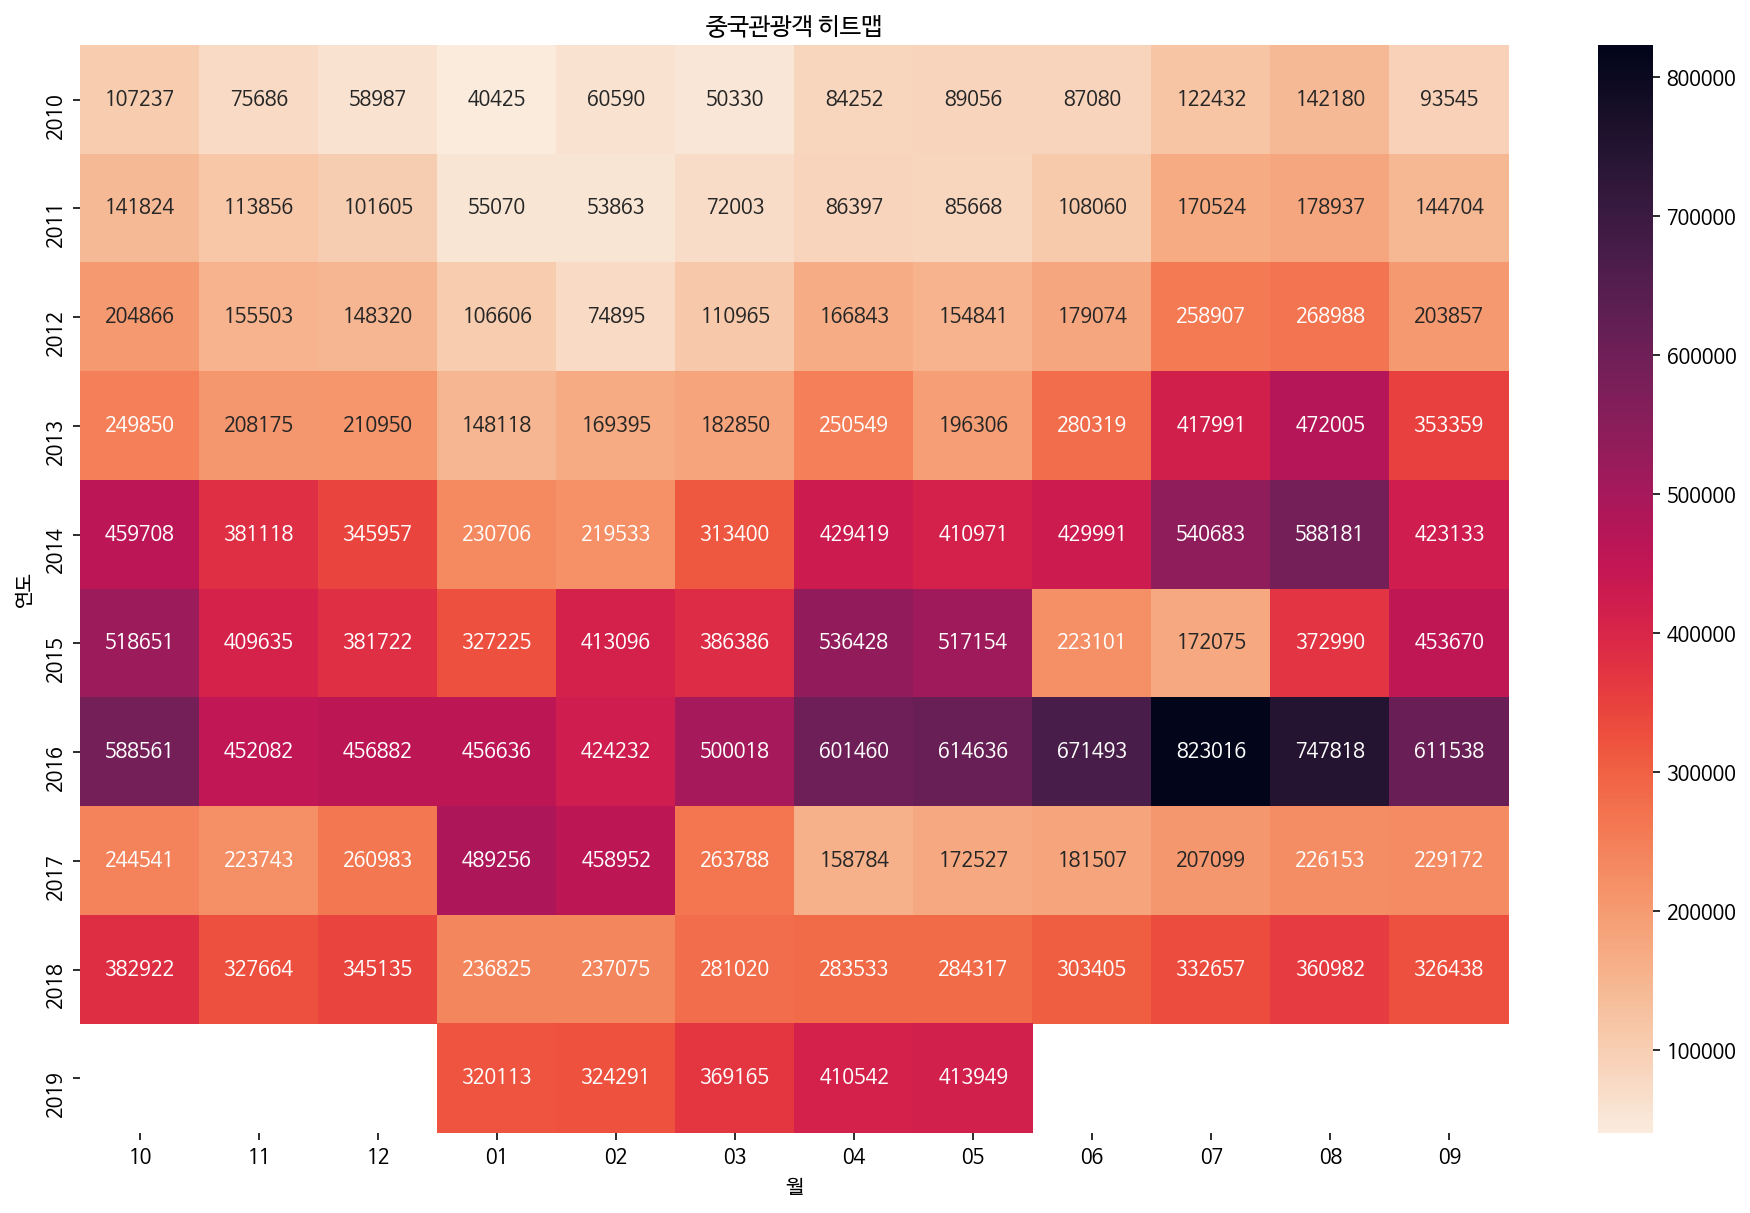

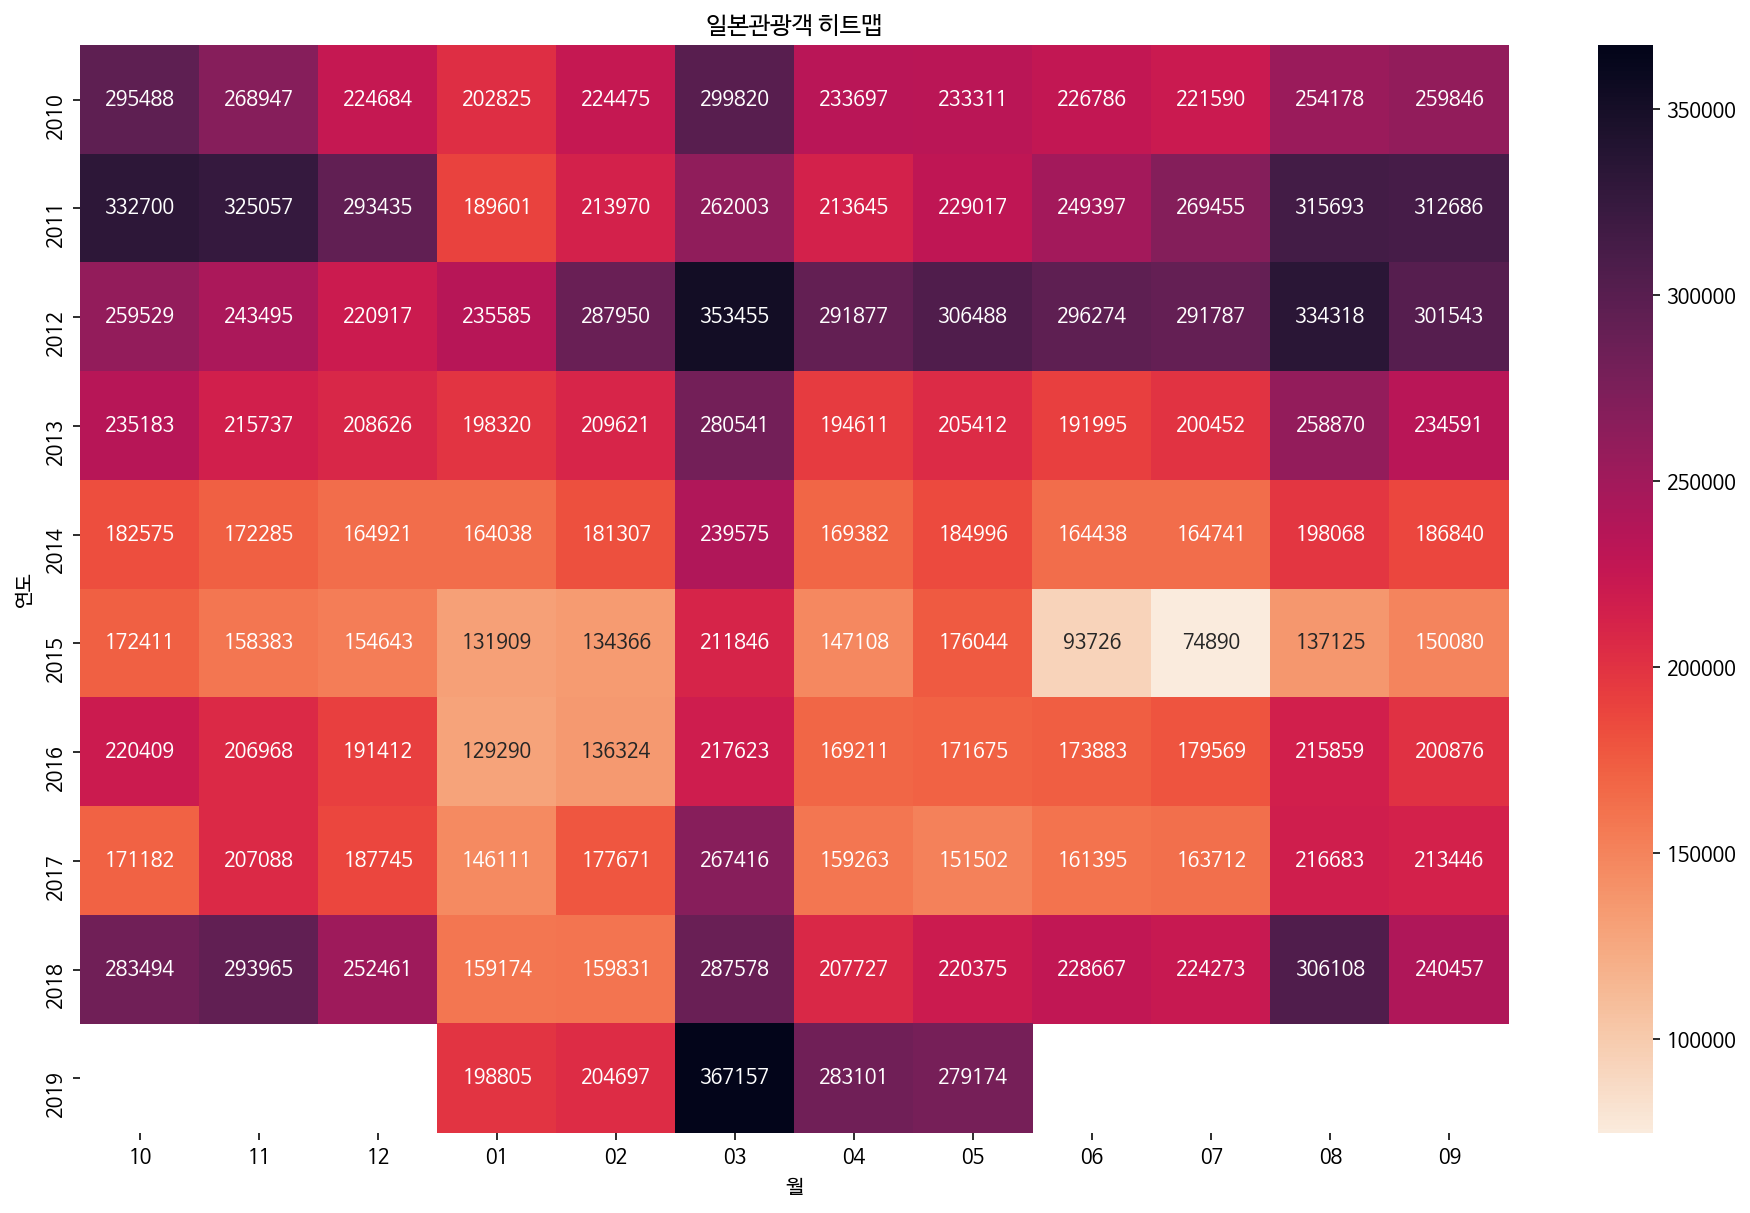

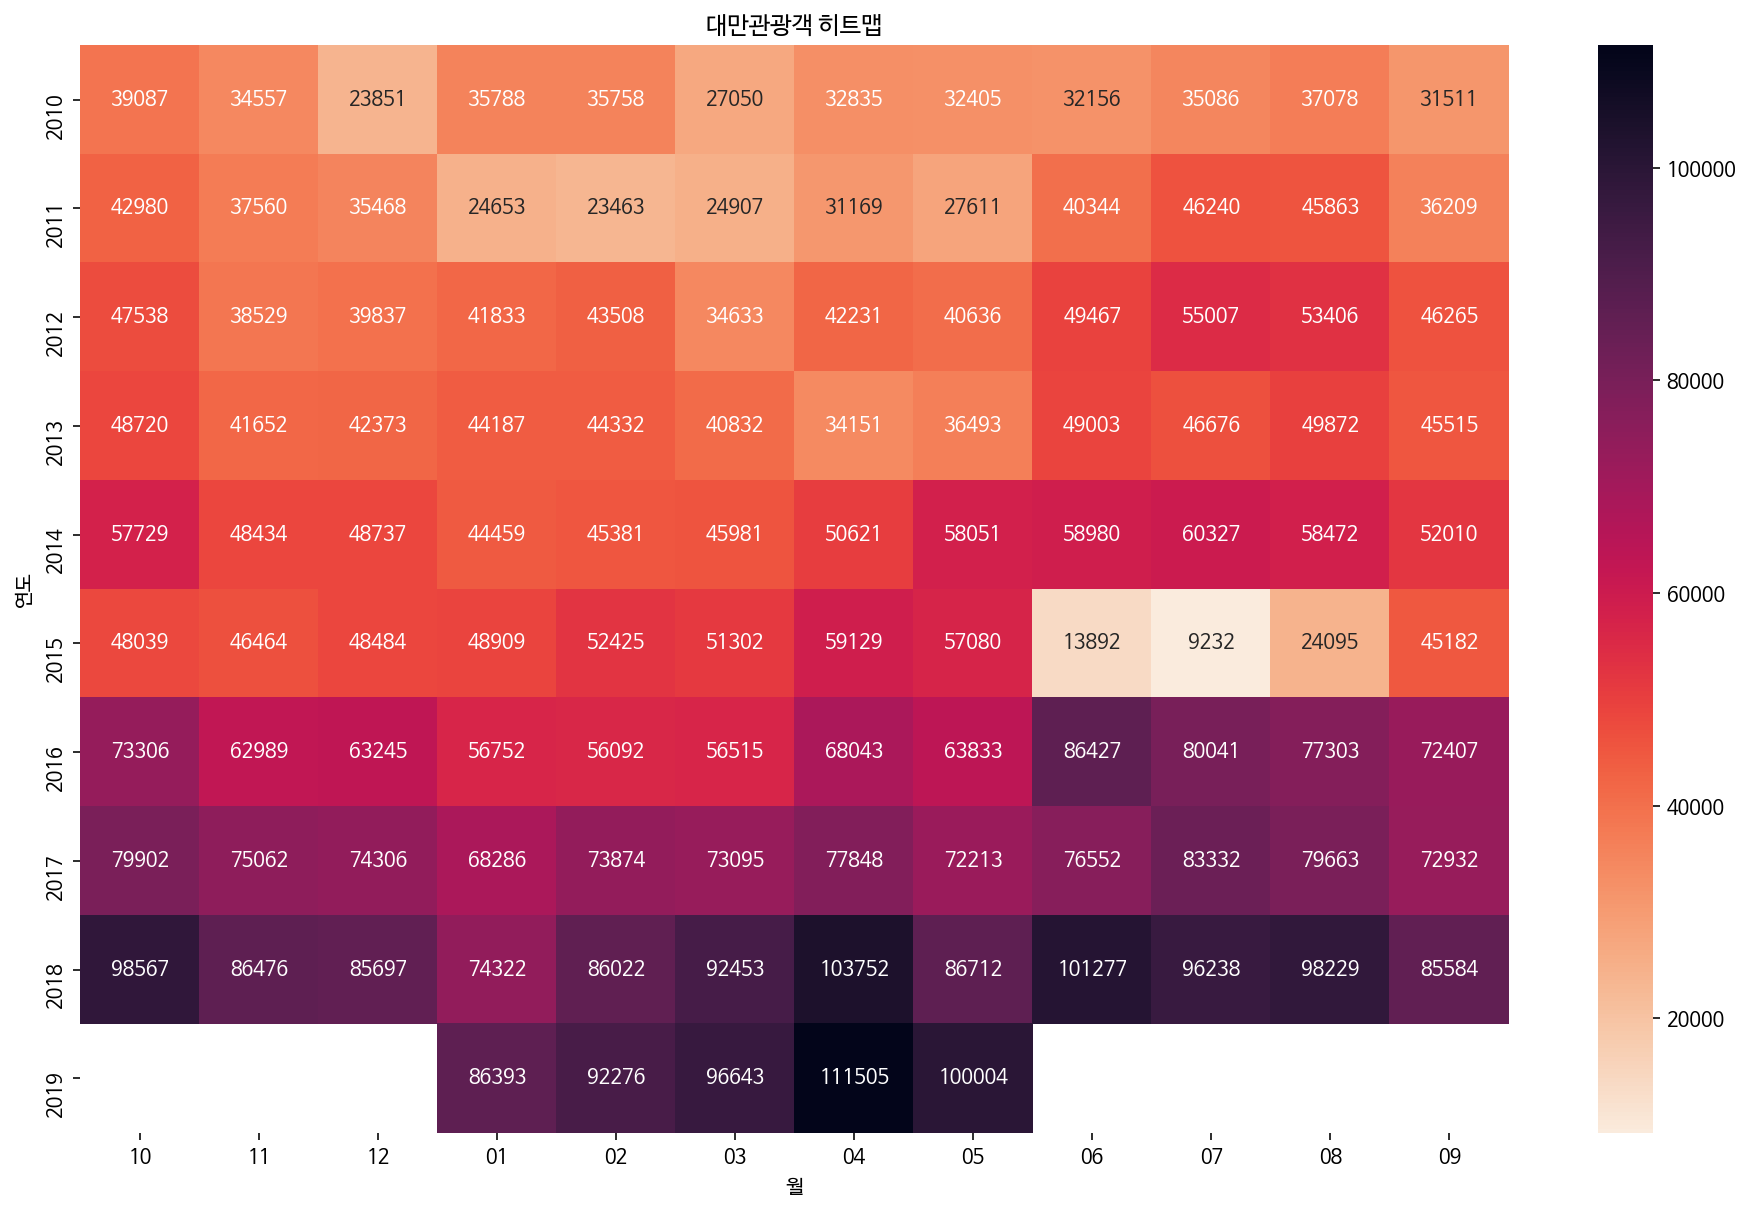

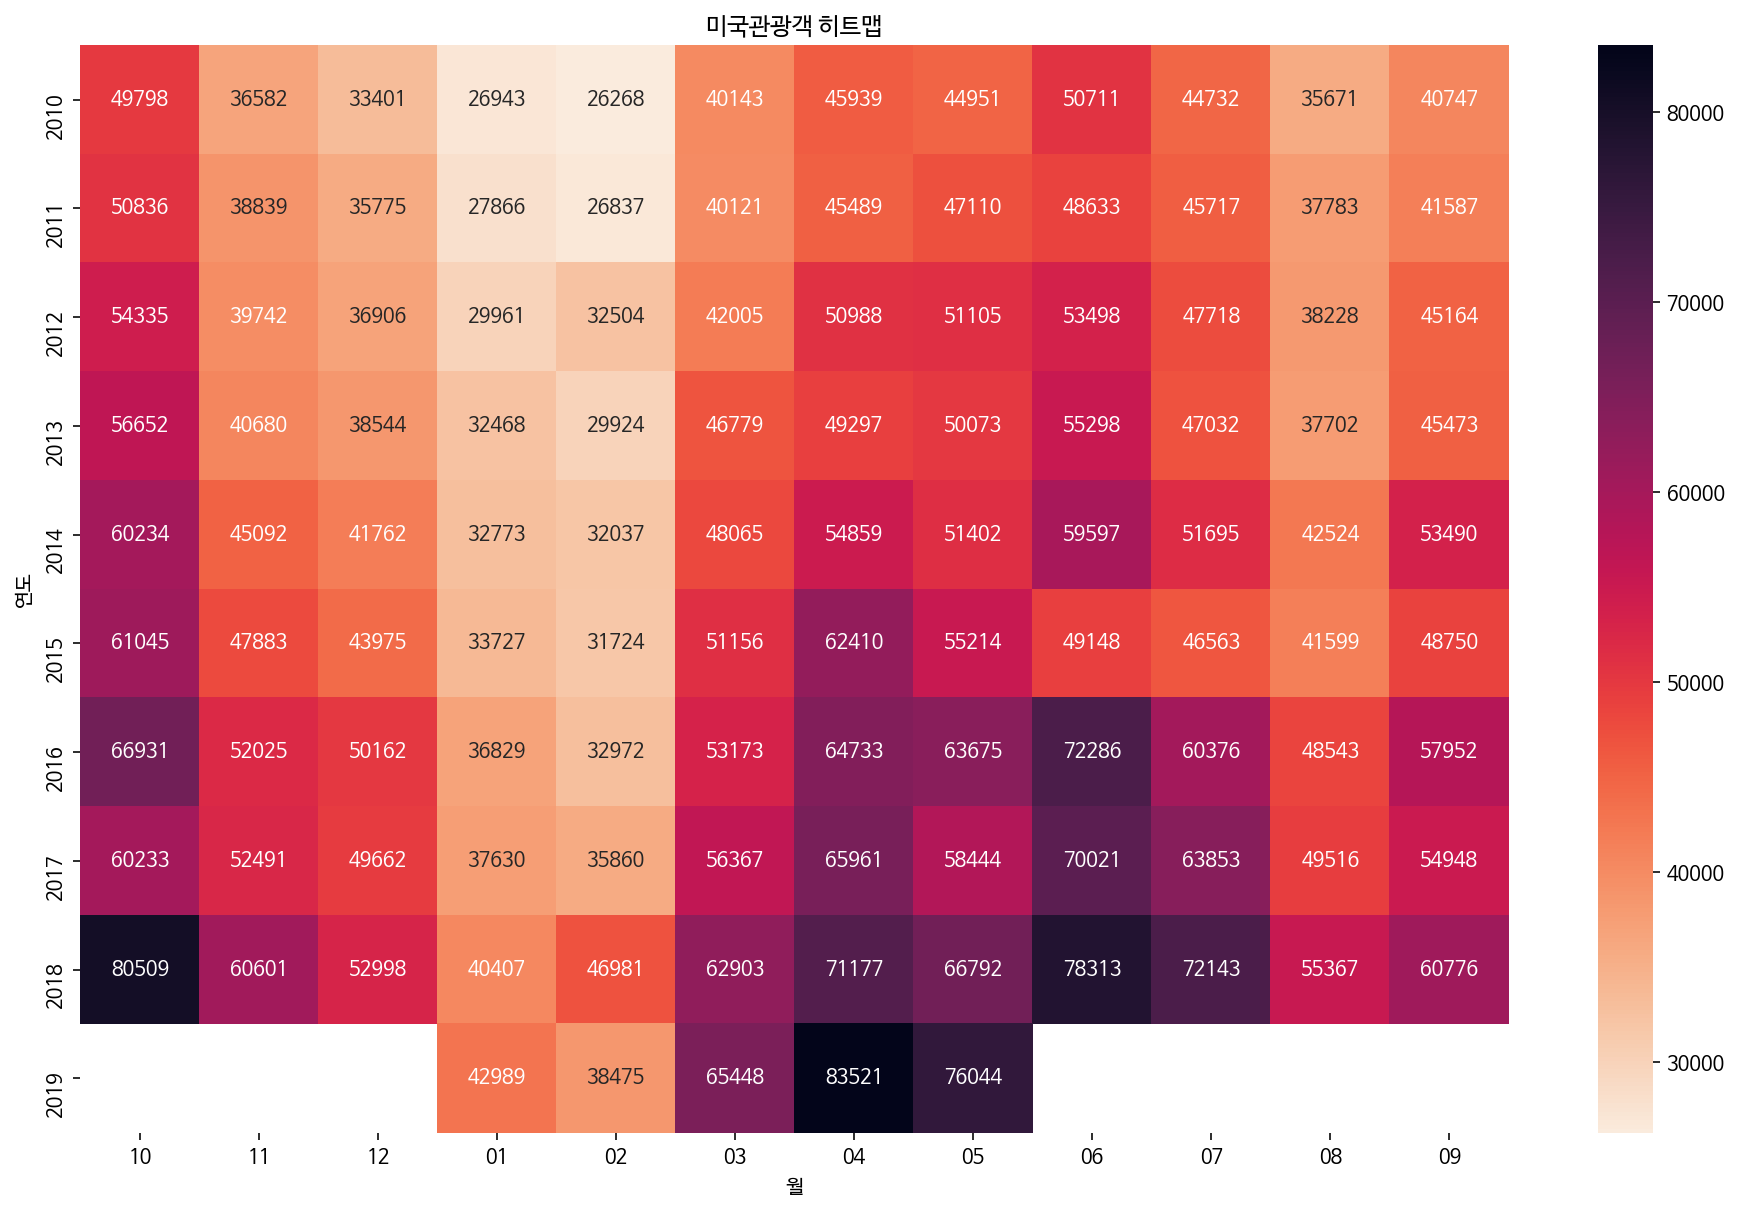

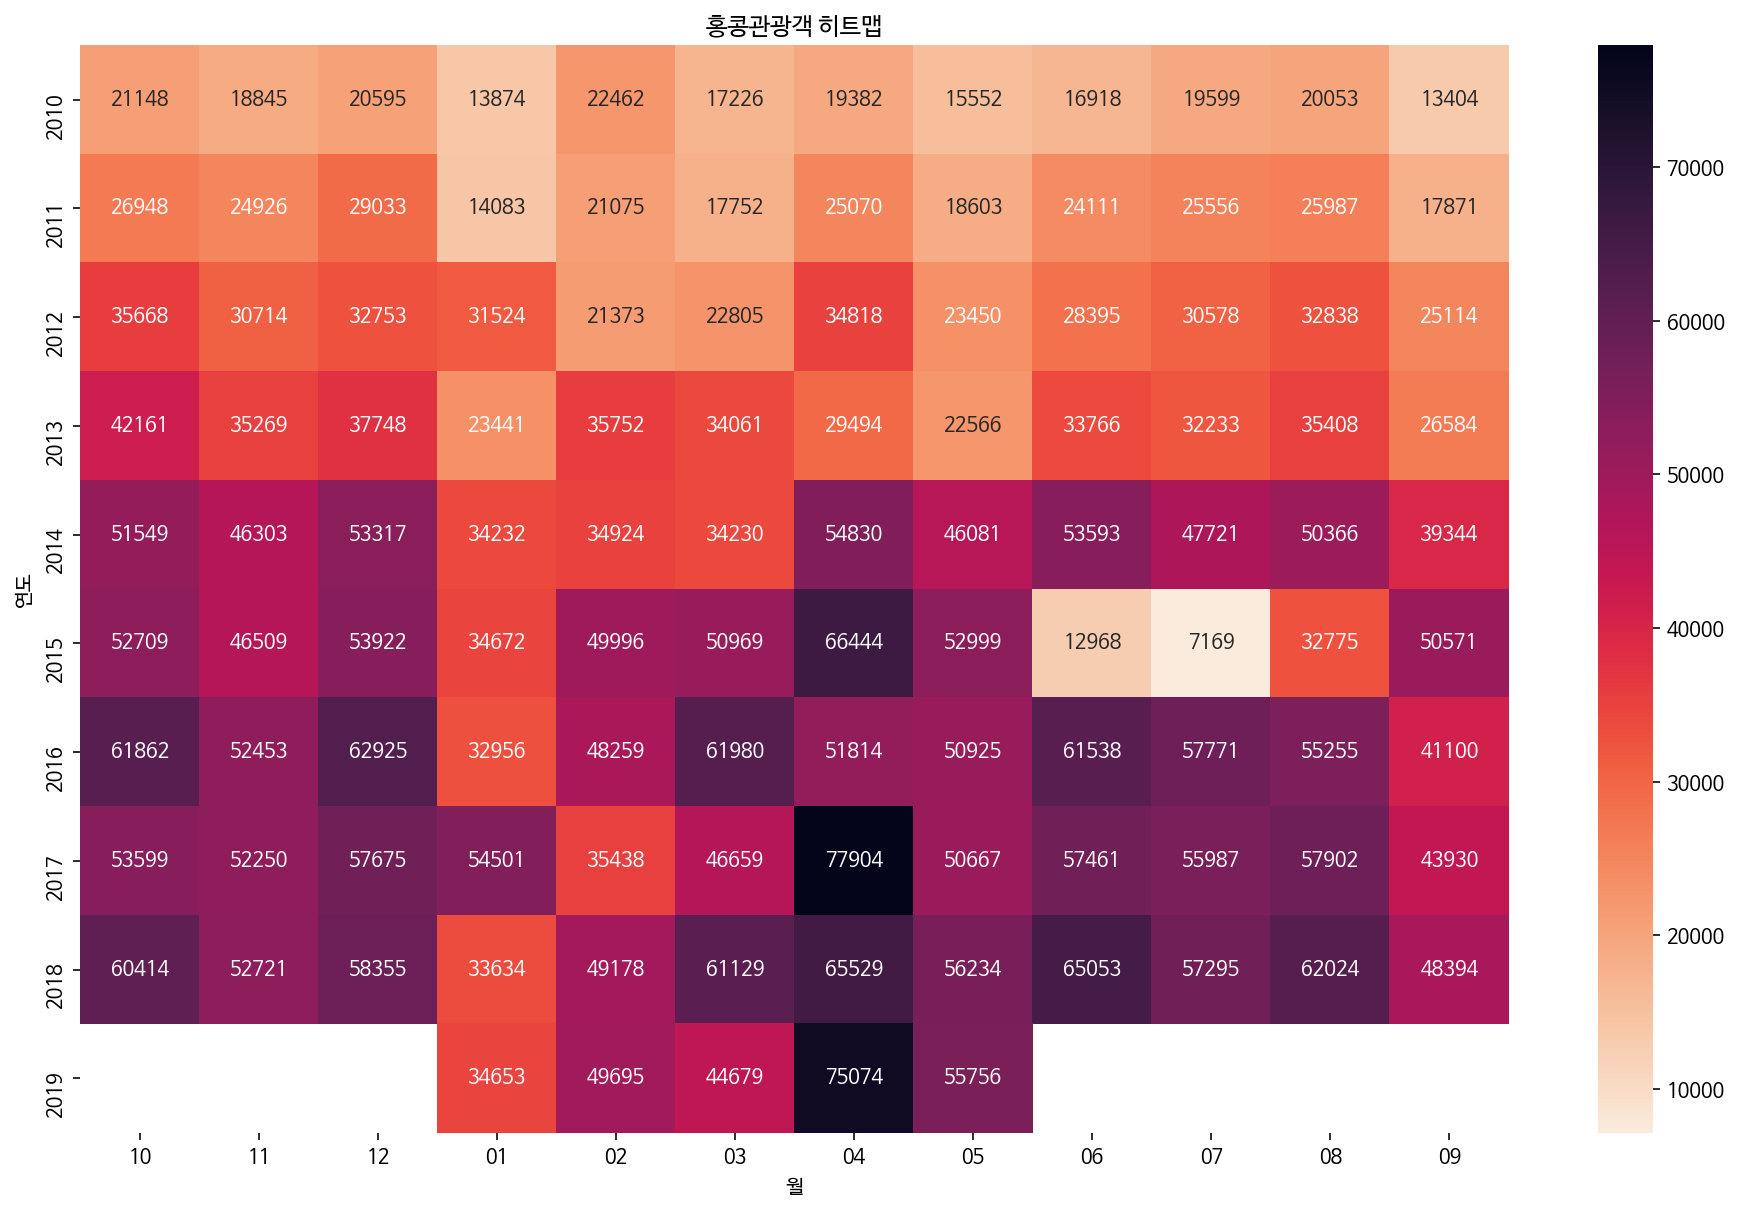

In [ ]:
import seaborn as sns

countrynames = ['중국','일본','대만','미국','홍콩']

for i in countrynames:
    plt.figure(figsize = (16, 10))
    filter = df_country[df_country['국적'] == i]
    df_pivot = filter.pivot_table(values = '관광', index = '연도', columns = '월')
    sns.heatmap(df_pivot, fmt = '.0f', annot = True, cmap='rocket_r')
    plt.title('{}관광객 히트맵'.format(i))
    plt.show()

